# Lec6: Introduction to Graph Neural Networks
## GNN

- Node Embedding에서 수행하던 $ENC(v)$ 를 multiple layers of non-linear transformations으로 대체
- Note: 모든 이런 Deep Encoders들은 학습을 위해 3강에서 했던 node similarity function들과 combined되어 사용된다.

## Challenges

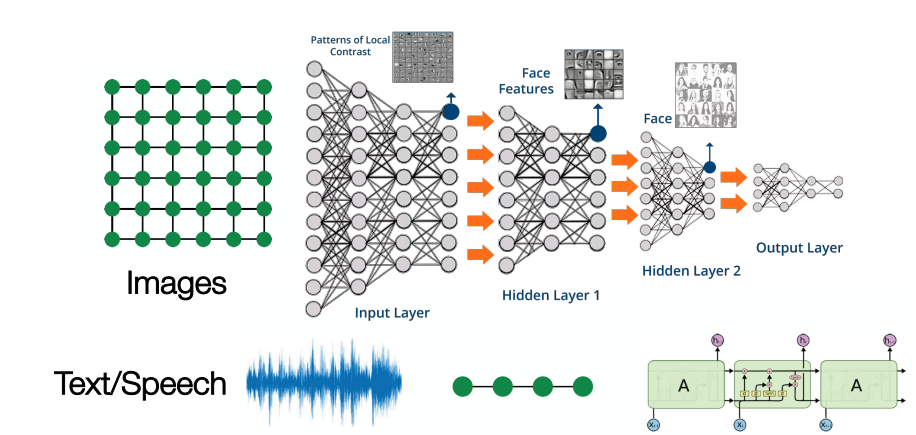

Modern deep learning toolbox is designed for simple sequences & grids, But networks are far more complex!

# ML as Optimization

- Supervised learning: input x → predict label y
- Input x 는 vector, sequences(자연어), Matrices(이미지), Graphs(potentially with node and edge features)등이 될 수 있다.

→ We formulate the task as an optimization problem: 

$$
min_{\Theta}L(y, f(x))
$$

- $L()$ = loss funtion
- $L(y, f(x))$ = Objective function
- $\Theta$ = a set of parameters we optimize (예를 들어, Shallow encoder의 경우 $\Theta = \{Z\}$ 이다.

> ex
> 
> - loss func = cross entropy(CE), label y = [0, 0, 1, 0, 0] (categorical vector_one-hot encoding)인 경우.
> - $f(x) = Softmax(g(x))$ → ($x$가 이 $f(x)$ 를 통과하면 [0.1, 0.3, 0.4, 0.1, 0.1] 같은 형태가 나올 것)
> - 학습을 시키기 위해서, $CE(y, f(x)) = - \sum^{C}_{i=1}(y_i \log{f(x)_i})$  로 정의 필요. ($C$ = the number of the classes)
> - $L=\sum_{x,y \in T}CE(y,f(x))$   ||    $T$ = traning set

### How to optimize the objective function?

- Gradient vector: Direction and rate of fastest increase
    
    ![Untitled 1.png](<attachment:Untitled 1.png>)

    repeatedly update weights in the (opposite) direction of gradients until convergence
    
    ![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%202.png)
    

### Neural Network Function

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%203.png)

### Back-propagation

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%204.png)

---

## Setup

Assume we have a graph $G$:

- $V$ is the vertex set
- $A$ is the adjacency matrix (assume binary)
- $X \in \mathbb{R}^{m \times |v|}$ is a matrix of node features
- $v$: a node in $V$; $N(v)$ : the set of neighbors of $v$.
- Node features
    1. Social networks: User profile, User image
    2. Biological networks: Gene expression profiles, gene functional information
    3. When there is no node feature in the graph dataset:
        - Indicator vectors (one-hot encoding of a node)
        - Vector of constant 1: [1, 1, …, 1]

## Idea1: A Naive Approach

- Join adjacency matrix and features, Feed them into a deep neural net:
    
    ![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%205.png)
    
- Issues with this idea:
    - $O(|V|)$  parameters, 노드 개수에 depended, 노드 순서에도 sensitive

### Idea2: Convolution Networks

But, 1. There is no fixed notion of locality or sliding window on the graph and 2. Graph is permutation invariant

---

## Idea2-1:Graph Convolutional Networks(GCN)

- Idea: Node’s neighborhood defines a computation graph

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%206.png)

## Idea3: Aggregate Neighbors

- Key idea: Generate node embeddings based on local network neighborhoods
- Intuition: Nodes aggregate information from their neighbors using neural networks

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%207.png)

---

## Idea3: Aggregate Neighbors : Math

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%208.png)

여기서, parameters는 $W_l$ 과 $B_l$ 이다.

$h^l_v$ 는 layer $l$ 에서 node $v$ 의 hidden representation이라고 할 수있다.

- $W_k$: weight matrix for neighborhood aggregation
- $B_k$: weight matrix for transforming hidden vector of self

---

### Many aggregations can be performed efficiently by (sparse) matrix operations

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%209.png)

즉, 정리하면 다음과 같이 표현이 가능하다.

$H^{l+1}=\sigma(\tilde A H^{(l)}W_l^T + H^{(l)}B_l^T)$ where $\tilde A = D^{-1}A$

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%2010.png)

- Red: neighborhood aggregation
- Blue: self transformation

- Note: not all GNNs can be expressed in matrix form, when
aggregation function is complex

---

## How to train?

![Untitled](Lec6%20Introduction%20to%20Graph%20Neural%20Networks%20316bf5c547874981a239f727a8d8da73/Untitled%2011.png)
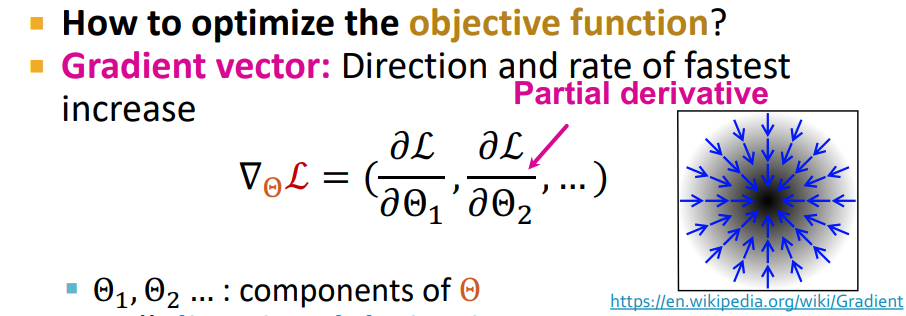